In [57]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#Import libraries for machine learning modelling
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier

import joblib


In [58]:
#Import dataset for analysis
df = pd.read_csv(r"heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [59]:
dp = df[['Age','RestingBP','Cholesterol','MaxHR','HeartDisease']]
dp.head()

,Age,RestingBP,Cholesterol,MaxHR,HeartDisease
0,40,140,289,172,0
1,49,160,180,156,1
2,37,130,283,98,0
3,48,138,214,108,1
4,54,150,195,122,0


In [60]:
df.shape

(918, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [62]:
feature = df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
feature.describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [63]:
df['Sex'] = df['Sex'].replace({"M":0, "F":1})
df['ChestPainType'] = df['ChestPainType'].replace({"TA":0, "ATA":1, "NAP":2, "ASY":3})
df['RestingECG'] = df['RestingECG'].replace({"Normal":0, "ST":1, "LVH":2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({"N":0, "Y":1})
df['ST_Slope'] = df['ST_Slope'].replace({"Up":0, "Flat":1, "Down":2})

C:\Users\PC\AppData\Local\Temp\ipykernel_10960\591449613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({"M":0, "F":1})
C:\Users\PC\AppData\Local\Temp\ipykernel_10960\591449613.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({"TA":0, "ATA":1, "NAP":2, "ASY":3})
C:\Users\PC\AppData\Local\Temp\ipykernel_10960\591449613.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

In [64]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [65]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


In [66]:
#check for empty values in the columns
df.columns[df.isnull().any()].tolist()

[]

In [67]:
#Check for empty values in the rows
df.index[df.isnull().any(axis=1)].tolist()

[]

In [68]:
df.columns.to_list()


['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [69]:
#Check for zeros in the dataset

(df==0).sum()

Age                 0
Sex               725
ChestPainType      46
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG        552
MaxHR               0
ExerciseAngina    547
Oldpeak           368
ST_Slope          395
HeartDisease      410
dtype: int64

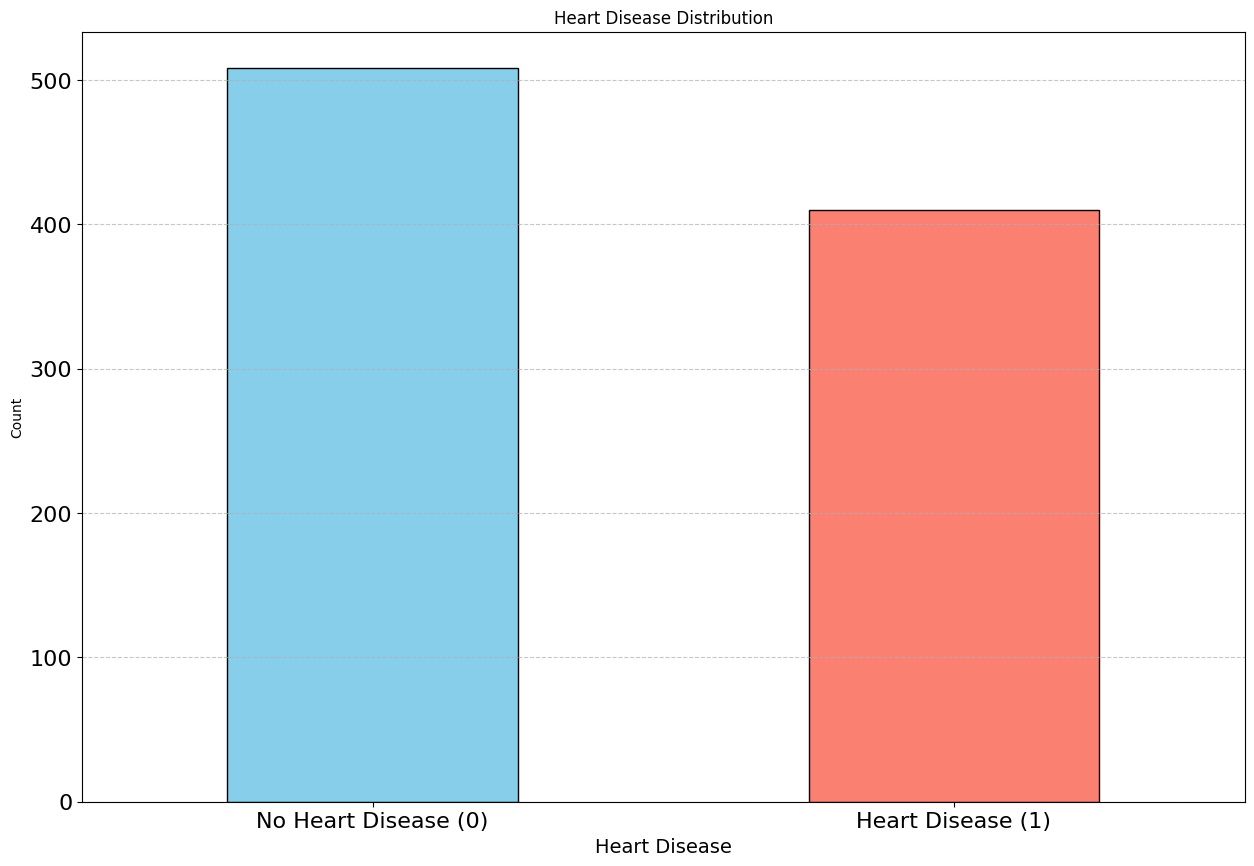

In [70]:
#Barplot for the target variable(Heart Disease)
plt.figure(figsize=(15, 10))
df['HeartDisease'].value_counts().plot(kind='bar', color = ['skyblue','salmon'], edgecolor='black')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease', fontsize = 14)
plt.ylabel('Count')
plt.yticks(fontsize = 16)
plt.xticks(rotation = 0,ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'], fontsize = 16)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_10960\3830674620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'HeartDisease', y = col, data = dp, palette = 'coolwarm')
C:\Users\PC\AppData\Local\Temp\ipykernel_10960\3830674620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'HeartDisease', y = col, data = dp, palette = 'coolwarm')
C:\Users\PC\AppData\Local\Temp\ipykernel_10960\3830674620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'HeartDisease', y = col, data = dp, palette = 'coolwarm')
C:\Users\PC\AppData\Local\Temp\

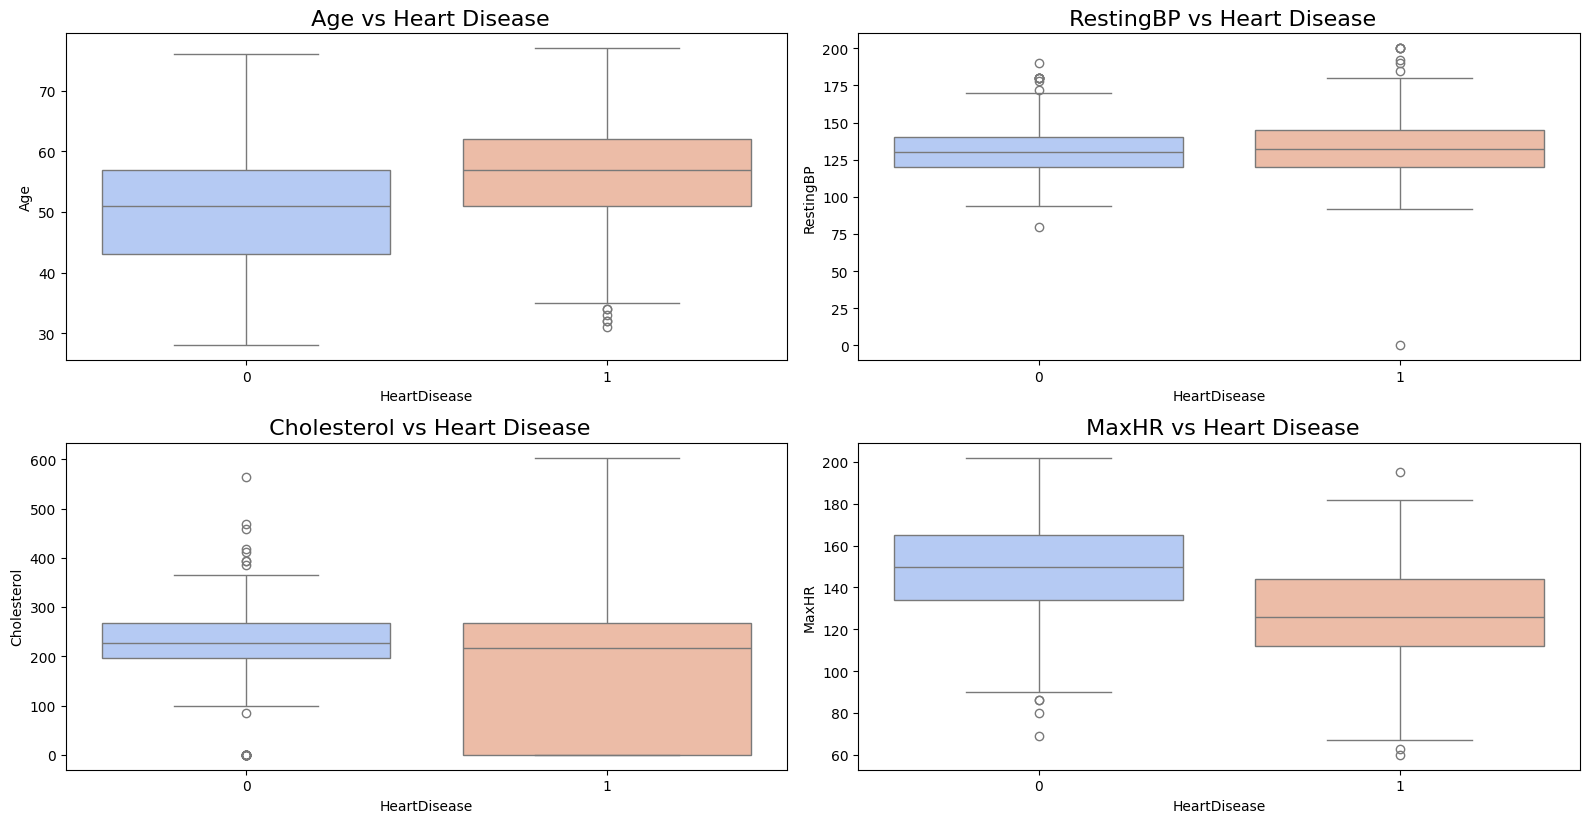

In [71]:
#Boxplot for Outliers detection
plt.figure(figsize=(16, 12))
for idx, col in enumerate(dp.columns[:-1], 1):
    plt.subplot(3,2, idx)
    sns.boxplot(x = 'HeartDisease', y = col, data = dp, palette = 'coolwarm')
    plt.title(f' {col} vs Heart Disease', fontsize=16)
plt.tight_layout()
plt.show()

In [72]:

def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

df = remove_outliers_zscore(df, columns=[], threshold=2.5)

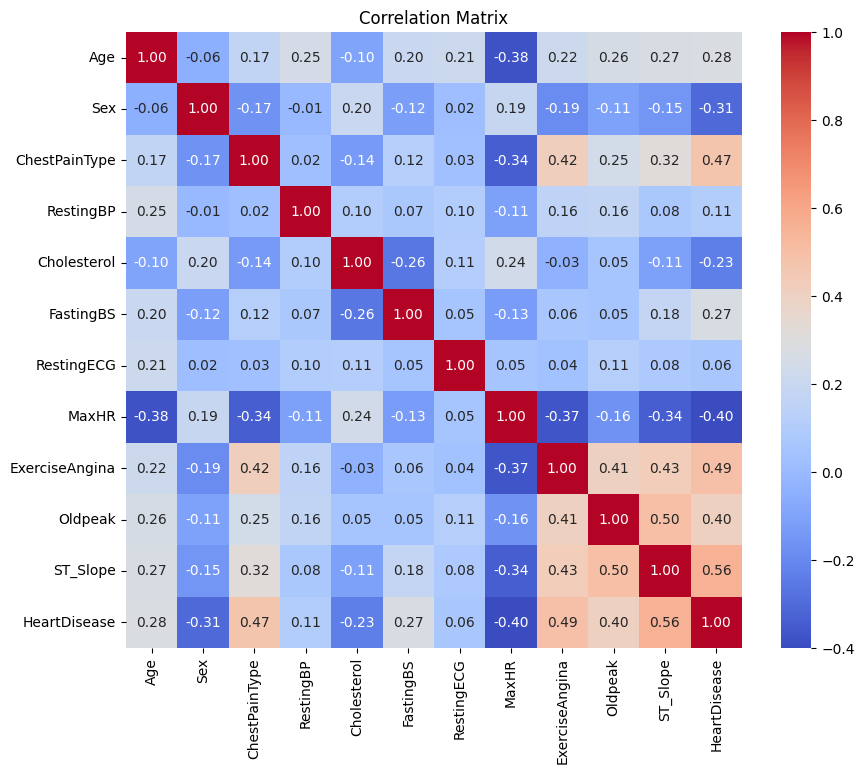

In [73]:
# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


TRAINING THE MODEL

In [74]:
#Seperate features and target variable
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           1   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           2   
917   38    0              2        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [75]:
#split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [76]:
#Let's check the shape of the training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 11)
X_test shape: (184, 11)
y_train shape: (734,)
y_test shape: (184,)


In [77]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
#Predict on test set
y_pred = model.predict(X_test)

In [79]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [80]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.842391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



VISUALIZATION OF CONFUSION MATRIX

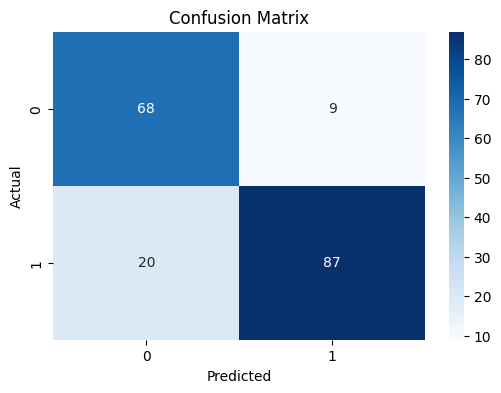

In [82]:
#Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [84]:
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.8641304347826086

XGBoost Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:08:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Logistic Regression Accuracy: 0.842391304347826
XGBoost Accuracy: 0.8641304347826086

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184


XGBoost Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



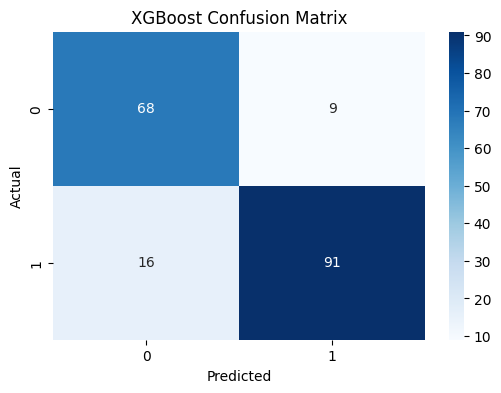

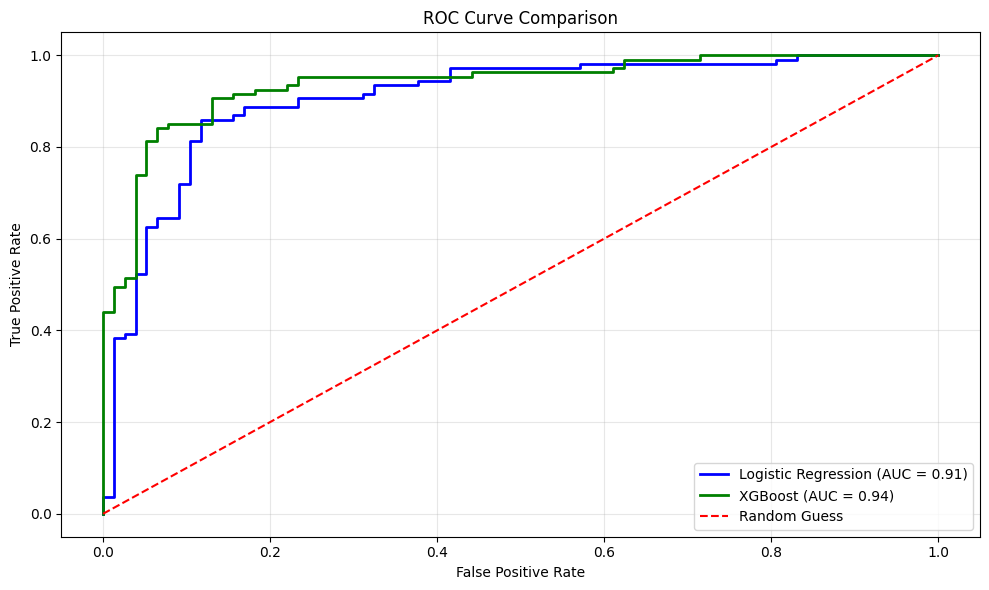

In [85]:

# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_proba = log_model.predict_proba(X_test)[:, 1]

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# --- Evaluation Reports ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nLogistic Regression Report:\n", classification_report(y_test, log_pred))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))

# --- Confusion Matrix for XGBoost ---
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# --- ROC Curve & AUC ---
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_log = auc(fpr_log, tpr_log)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


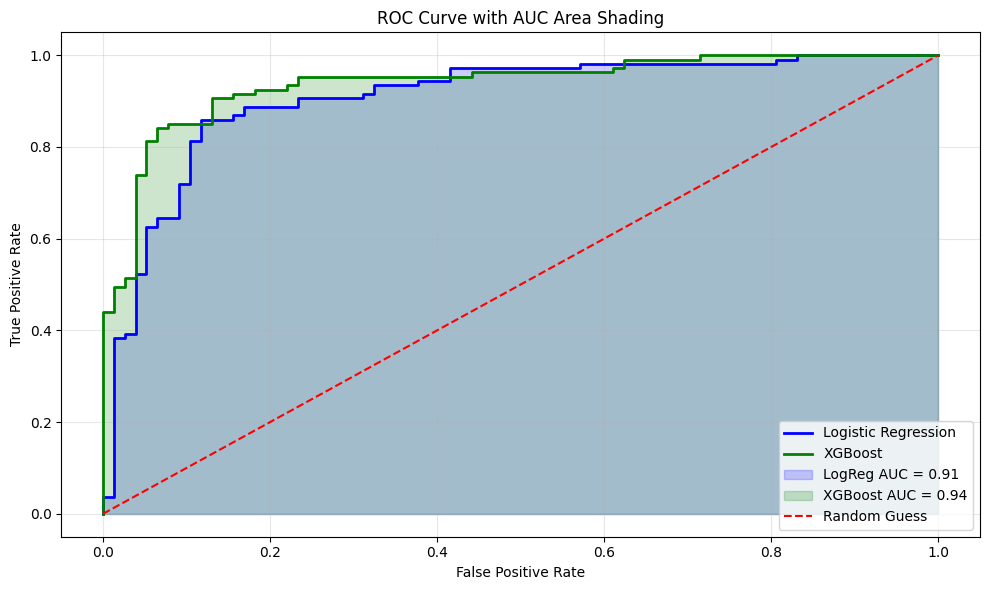

In [86]:
# Calculate ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))

# Plot ROC curves
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost')

# Fill area under the curve (shading)
plt.fill_between(fpr_log, tpr_log, alpha=0.2, color='blue', label=f'LogReg AUC = {auc_log:.2f}')
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.2, color='green', label=f'XGBoost AUC = {auc_xgb:.2f}')

# Random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1.5, label='Random Guess')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area Shading')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [87]:
# After training the xgb_model
joblib.dump(xgb_model, "Xgb_HeartDisease_model.pkl")

['Xgb_HeartDisease_model.pkl']